# Occupation. Parte 2. Agrupación!

### Step 1. Importamos las librerías

In [1]:
import pandas as pd

### Step 2. Importar el conjunto de datos de esta [dirección](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user). 

In [4]:
usuarios = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",
                        sep="|")
usuarios

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


### Step 3. Asignarlo a una variable llamada usuarios.

### Step 4. Descubrir cuál es la edad media por ocupación

In [7]:
usuarios.groupby("occupation")["age"].median().sort_values()

occupation
student          21.0
entertainment    25.0
none             26.0
artist           30.0
programmer       30.0
technician       30.0
homemaker        32.0
other            32.0
salesman         34.0
lawyer           34.0
writer           36.0
engineer         36.0
marketing        36.0
scientist        37.0
administrator    37.0
executive        38.5
librarian        39.0
educator         42.0
healthcare       44.5
doctor           45.0
retired          63.0
Name: age, dtype: float64

### Step 5. Descubrir la proporción de hombres por ocupación y ordenarla de mayor a menor

In [30]:
df = usuarios.copy()
df["male"] = (usuarios["gender"] == "M").astype(int)
out = df.groupby("occupation")[["male"]].mean().sort_values(by="male", ascending=False)
out["male_pct"] = out["male"].apply(lambda x: f"{x:.2%}")
out

,male,male_pct
occupation,,
doctor,1.000000,100.00%
engineer,0.970149,97.01%
technician,0.962963,96.30%
retired,0.928571,92.86%
programmer,0.909091,90.91%
executive,0.906250,90.62%
scientist,0.903226,90.32%
entertainment,0.888889,88.89%
lawyer,0.833333,83.33%


<AxesSubplot: xlabel='occupation'>

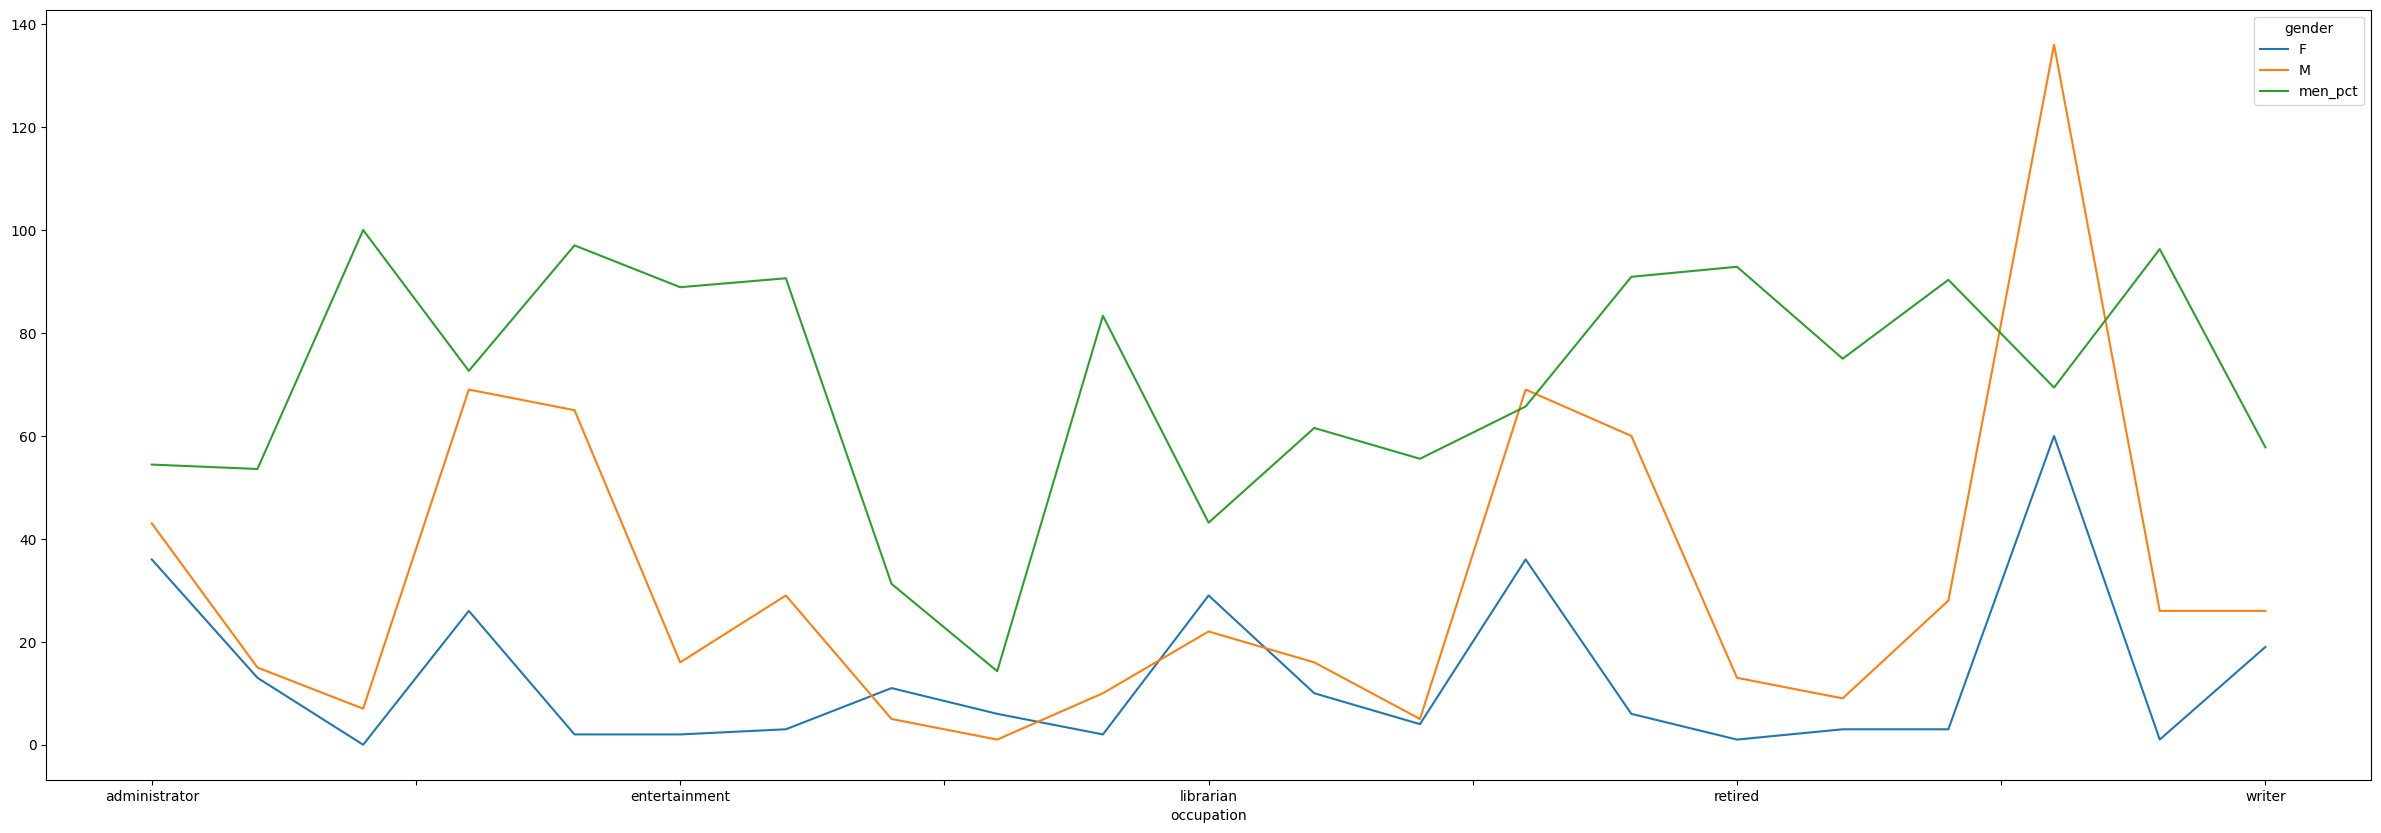

In [47]:
out2 = df.groupby(["occupation", "gender"])["user_id"].count()
out2 = out2.unstack().fillna(0)
out2["men_pct"] = (out2["M"] / (out2["M"] + out2["F"])) * 100
import matplotlib.pyplot as plt
# plt.Figure(figsize=(30, 3))
out2.plot(figsize=(30, 10))

### Step 6. Para cada ocupación, calcula las edades mínima y máxima

In [49]:
usuarios.groupby("occupation")["age"]\
        .aggregate(["min", "max"])\
        .rename(columns={"min": "age_min", "max":"age_max"})

,age_min,age_max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


### Step 7. For each combination of occupation and gender, calculate the mean age

In [53]:
usuarios.groupby(["occupation", "gender"])["age"].mean().unstack(level="gender")

gender,F,M
occupation,,
administrator,40.638889,37.162791
artist,30.307692,32.333333
doctor,NaN,43.571429
educator,39.115385,43.101449
engineer,29.500000,36.600000
entertainment,31.000000,29.000000
executive,44.000000,38.172414
healthcare,39.818182,45.400000
homemaker,34.166667,23.000000


### Step 8.  Para cada combinación de ocupación y género, calcule la edad media